In [1]:
#import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'CM Roman'
matplotlib.rcParams['font.size'] = 12

In [2]:
with open("./Scintillator_Measurements/PMT_data.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

Min = np.array([float(line.split(',')[0]) for line in lines])
integral = np.array([float(line.split(',')[1]) for line in lines])
discrimination_value = -0.1
index_dis = np.where(Min < discrimination_value)[0]
min1 = abs(Min[index_dis])
integral1 = abs(integral[index_dis])

with open("./Diode_Photomultiplier/SiPMT_data.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

Max = np.array([float(line.split(',')[0]) for line in lines])
integral = np.array([float(line.split(',')[1]) for line in lines])
discrimination_value = 0.01
index_dis = np.where(Max > discrimination_value)[0]
max2 = Max[index_dis]
integral2 = integral[index_dis]

with open("./Diode_Photomultiplier/SiPMT_data_mirror.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

Max = np.array([float(line.split(',')[0]) for line in lines])
integral = np.array([float(line.split(',')[1]) for line in lines])
discrimination_value = 0.01
index_dis = np.where(Max > discrimination_value)[0]
max3 = Max[index_dis]
integral3 = integral[index_dis]

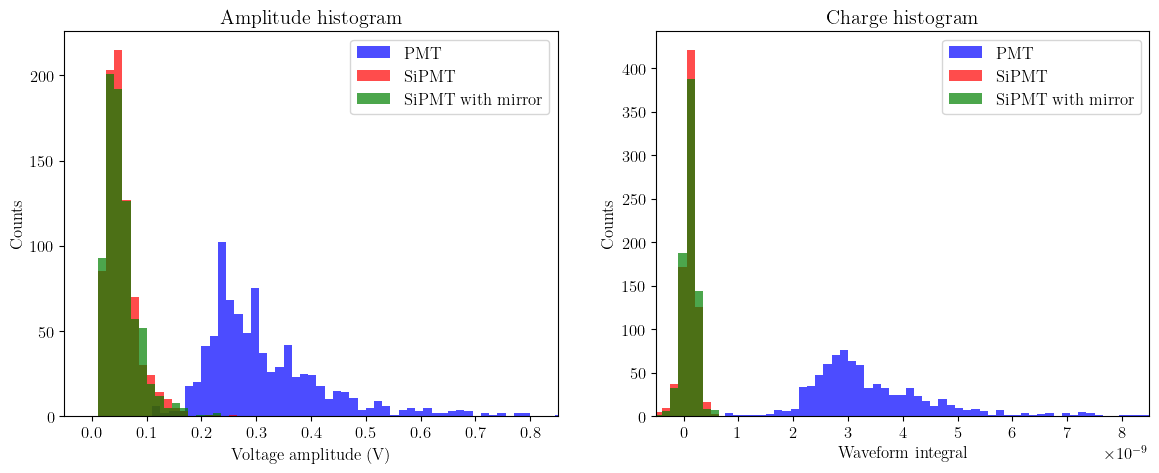

In [22]:
#Figure
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

width = 0.015
bins_min = np.arange(min(min1), max(min1) + width, width)
bins_max = np.arange(min(max2), max(max2) + width, width)

ax1.hist(min1,bins = bins_min, color='b', alpha=0.7, label='PMT')
ax1.hist(max2,bins = bins_max, color='r', alpha=0.7, label='SiPMT')
ax1.hist(max3,bins = bins_max, color='g', alpha=0.7, label='SiPMT with mirror')
ax1.set_xlim([-0.05, 0.85])
ax1.set_xlabel('Voltage amplitude (V)')
ax1.set_ylabel('Counts')
ax1.set_title('Amplitude histogram')
ax1.legend()

width = 1.5e-10
bins_min = np.arange(min(integral1), max(integral1) + width, width)
bins_max = np.arange(min(integral2), max(integral2) + width, width)

ax2.hist(integral1,bins = bins_min, color='b', alpha=0.7, label='PMT')
ax2.hist(integral2,bins = bins_max, color='r', alpha=0.7, label='SiPMT')
ax2.hist(integral3,bins = bins_max, color='g', alpha=0.7, label='SiPMT with mirror')
ax2.set_xlim([-0.05e-8, 0.85e-8])
ax2.set_xlabel('Waveform integral')
ax2.set_ylabel('Counts')
ax2.set_title('Charge histogram')
ax2.legend()

fig.savefig('./Images/DifferentPMTs_AmplitudeCharge.pdf')